In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.float_ = np.float64

datapath = 'sample-data/doctorright-datalake'


In [16]:
mx_submits = pd.read_parquet(f'{datapath}/mx_submitsline.parquet')
mx_submits.head()

,attending_provider_npi,billing_provider_address_cbsa_name,billing_provider_address_city,billing_provider_address_county,billing_provider_address_key,billing_provider_address_latitude,billing_provider_address_longitude,billing_provider_address_precision,billing_provider_address_region,billing_provider_address_state,billing_provider_address_street,billing_provider_address_zipcode,billing_provider_npi,claim_all_diagnosis_codes,claim_filing_indicator_code,claim_filing_indicator_description,claim_filing_indicator_pay_type,claim_id,claim_institutional_or_professional,claim_number,claim_statement_from_date,claim_statement_to_date,claim_total_charge_amount,clearinghouse_received_date,cohort_key,cohort_record_id,cycle_id,diagnosis_code_1,diagnosis_code_2,diagnosis_code_3,diagnosis_code_4,diagnosis_code_5,diagnosis_code_6,diagnosis_code_7,diagnosis_code_8,drg_code,facility_provider_address_cbsa_code,facility_provider_address_cbsa_name,facility_provider_address_city,facility_provider_address_county,facility_provider_address_key,facility_provider_address_latitude,facility_provider_address_longitude,facility_provider_address_precision,facility_provider_address_region,facility_provider_address_state,facility_provider_address_street,facility_provider_address_suite,facility_provider_address_zipcode,facility_provider_address_zipcode_type,facility_provider_npi,inpatient_admission_date,inpatient_admission_source_description,inpatient_admission_type_description,inpatient_admitting_diagnosis_code,inpatient_discharge_status_code,inpatient_discharge_status_description,operating_provider_npi,organization_id,organization_name,organization_npi_type_code,organization_sourced_from,organization_sourced_npi,organization_taxonomy_classification,organization_taxonomy_code,organization_taxonomy_description,organization_taxonomy_group,patient_birth_year,patient_gender,patient_id,patient_location_preferred_latitude,patient_location_preferred_longitude,patient_location_preferred_type,patient_location_preferred_zipcode,patient_location_residential_region,patient_location_residential_state,patient_location_residential_zip3,patient_relationship_to_subscriber_description,primary_payer_id_raw_source_value,primary_payer_name,primary_payer_name_raw_source_value,primary_payer_pay_type,primary_payer_pay_type_raw_source_value,primary_payer_plan_type,primary_payer_state_raw_source_value,principal_diagnosis_body_part,principal_diagnosis_category,principal_diagnosis_classification,principal_diagnosis_code_set,principal_diagnosis_description,principal_procedure_category,principal_procedure_code,principal_procedure_code_set,principal_procedure_description,referring_provider_current_practice_organization_id,referring_provider_current_practice_organization_name,referring_provider_name,referring_provider_npi,referring_provider_npi_type_code,referring_provider_taxonomy_classification,referring_provider_taxonomy_code,referring_provider_taxonomy_description,referring_provider_taxonomy_group,rendering_provider_current_practice_organization_id,rendering_provider_current_practice_organization_name,rendering_provider_name,rendering_provider_npi,rendering_provider_npi_type_code,rendering_provider_taxonomy_classification,rendering_provider_taxonomy_code,rendering_provider_taxonomy_description,rendering_provider_taxonomy_group,secondary_payer_claim_filing_indicator_code,secondary_payer_id,secondary_payer_name,secondary_payer_name_raw_source_value,secondary_payer_pay_type,secondary_payer_plan_type,secondary_payer_state,source_id,source_increment_id,type_of_bill_classification_description,type_of_bill_code,type_of_bill_facility_description,type_of_bill_frequency_description,vendorname,line_level_number,line_level_emergency_indicator,line_level_charge_amount,line_level_drug_ndc,line_level_drug_dosage_route,line_level_drug_name,line_level_drug_packaging_information,line_level_drug_product_type,line_level_drug_brand_name,line_level_place_of_service_description,line_level_place_of_service_code,

In [41]:
mx_submits.principal_procedure_code_set.value_counts().head(10)

principal_procedure_code_set
CPT         10910615
HCPC         2746718
ICD10         308861
HIPPS          88800
ICD9           19955
ICD10PCS       15841
Name: count, dtype: int64

In [17]:
mx_submits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15501334 entries, 0 to 15501333
Columns: 150 entries, attending_provider_npi to line_level_units_billed
dtypes: datetime64[ns](6), float64(2), object(142)
memory usage: 17.3+ GB


In [49]:
def categorize_columns(df):
    column_dict = {}
    
    for col in df.columns:
        major_topic = col.split('_')[0]  
        if major_topic not in column_dict:
            column_dict[major_topic] = []
        column_dict[major_topic].append(col)
    
    for topic, columns in column_dict.items():
        print(f"\nTopic: {topic.capitalize()}")
        print(f"Details: {', '.join(columns)}")
        print("-" * 50)

categorize_columns(mx_submits)


Topic: Attending
Details: attending_provider_npi
--------------------------------------------------

Topic: Billing
Details: billing_provider_address_cbsa_name, billing_provider_address_city, billing_provider_address_county, billing_provider_address_key, billing_provider_address_latitude, billing_provider_address_longitude, billing_provider_address_precision, billing_provider_address_region, billing_provider_address_state, billing_provider_address_street, billing_provider_address_zipcode, billing_provider_npi
--------------------------------------------------

Topic: Claim
Details: claim_all_diagnosis_codes, claim_filing_indicator_code, claim_filing_indicator_description, claim_filing_indicator_pay_type, claim_id, claim_institutional_or_professional, claim_number, claim_statement_from_date, claim_statement_to_date, claim_total_charge_amount
--------------------------------------------------

Topic: Clearinghouse
Details: clearinghouse_received_date
------------------------------------

In [18]:
for c in mx_submits.columns:
    print(f'{c}: {mx_submits[c].nunique()}')

attending_provider_npi: 59540
billing_provider_address_cbsa_name: 936
billing_provider_address_city: 6937
billing_provider_address_county: 1761
billing_provider_address_key: 119202
billing_provider_address_latitude: 118270
billing_provider_address_longitude: 117826
billing_provider_address_precision: 9
billing_provider_address_region: 4
billing_provider_address_state: 58
billing_provider_address_street: 115916
billing_provider_address_zipcode: 15812
billing_provider_npi: 162657
claim_all_diagnosis_codes: 0
claim_filing_indicator_code: 78
claim_filing_indicator_description: 36
claim_filing_indicator_pay_type: 6
claim_id: 5989256
claim_institutional_or_professional: 3
claim_number: 5989256
claim_statement_from_date: 3548
claim_statement_to_date: 3548
claim_total_charge_amount: 290115
clearinghouse_received_date: 3537
cohort_key: 4
cohort_record_id: 157935
cycle_id: 92
diagnosis_code_1: 29633
diagnosis_code_2: 26369
diagnosis_code_3: 22106
diagnosis_code_4: 18401
diagnosis_code_5: 13835
d

In [23]:
for c in mx_submits.columns:
    print(f'{c}: {mx_submits[c].isna().sum()}')

attending_provider_npi: 13969235
billing_provider_address_cbsa_name: 5370470
billing_provider_address_city: 5119805
billing_provider_address_county: 5118389
billing_provider_address_key: 5118389
billing_provider_address_latitude: 5118389
billing_provider_address_longitude: 5118389
billing_provider_address_precision: 5118389
billing_provider_address_region: 5119796
billing_provider_address_state: 5118397
billing_provider_address_street: 5118389
billing_provider_address_zipcode: 5119437
billing_provider_npi: 4142242
claim_all_diagnosis_codes: 15501334
claim_filing_indicator_code: 492295
claim_filing_indicator_description: 492295
claim_filing_indicator_pay_type: 492295
claim_id: 0
claim_institutional_or_professional: 0
claim_number: 0
claim_statement_from_date: 19255
claim_statement_to_date: 19255
claim_total_charge_amount: 20109
clearinghouse_received_date: 0
cohort_key: 0
cohort_record_id: 0
cycle_id: 0
diagnosis_code_1: 22619
diagnosis_code_2: 4983782
diagnosis_code_3: 7678663
diagnosi

In [27]:
pd.set_option('display.max_rows', None)
print(mx_submits.dtypes)

attending_provider_npi                                           object
billing_provider_address_cbsa_name                               object
billing_provider_address_city                                    object
billing_provider_address_county                                  object
billing_provider_address_key                                     object
billing_provider_address_latitude                                object
billing_provider_address_longitude                               object
billing_provider_address_precision                               object
billing_provider_address_region                                  object
billing_provider_address_state                                   object
billing_provider_address_street                                  object
billing_provider_address_zipcode                                 object
billing_provider_npi                                             object
claim_all_diagnosis_codes                                       

In [44]:
mx_submits.patient_birth_year.value_counts().head(10)

patient_birth_year
1932.0    367845
1953.0    318083
1956.0    304710
1960.0    293424
1947.0    291531
1951.0    278098
1961.0    276063
1957.0    273884
1948.0    270984
1963.0    266003
Name: count, dtype: int64

In [45]:
mx_submits.patient_location_preferred_type.value_counts().head(10)

patient_location_preferred_type
1.0    11755973
2.0     2011783
Name: count, dtype: int64

In [29]:
# Descriptive statistics for numerical columns
print(mx_submits.describe())

           claim_statement_from_date        claim_statement_to_date  \
count                       15482079                       15482079   
mean   2020-01-17 04:48:45.221089024  2020-01-19 18:14:08.373965312   
min              2013-11-13 00:00:00            2013-11-13 00:00:00   
25%              2017-11-03 00:00:00            2017-11-06 00:00:00   
50%              2020-02-12 00:00:00            2020-02-14 00:00:00   
75%              2022-05-03 00:00:00            2022-05-05 00:00:00   
max              2024-09-05 00:00:00            2024-09-05 00:00:00   
std                              NaN                            NaN   

         clearinghouse_received_date       inpatient_admission_date  \
count                       15501334                        1984190   
mean   2020-04-02 10:02:45.465911040  2019-08-05 13:40:50.425414400   
min              2015-01-01 00:00:00            1920-08-02 00:00:00   
25%              2018-04-09 00:00:00            2017-05-14 00:00:00   
50%  

In [32]:
missing_values = mx_submits.isnull().sum()

# Percent of missing values per column
missing_percentage = (missing_values / len(mx_submits)) * 100
print(missing_percentage)

attending_provider_npi                                    90.116341
billing_provider_address_cbsa_name                        34.645212
billing_provider_address_city                             33.028157
billing_provider_address_county                           33.019023
billing_provider_address_key                              33.019023
billing_provider_address_latitude                         33.019023
billing_provider_address_longitude                        33.019023
billing_provider_address_precision                        33.019023
billing_provider_address_region                           33.028099
billing_provider_address_state                            33.019074
billing_provider_address_street                           33.019023
billing_provider_address_zipcode                          33.025783
billing_provider_npi                                      26.721842
claim_all_diagnosis_codes                                100.000000
claim_filing_indicator_code                     

# Univariate Analysis

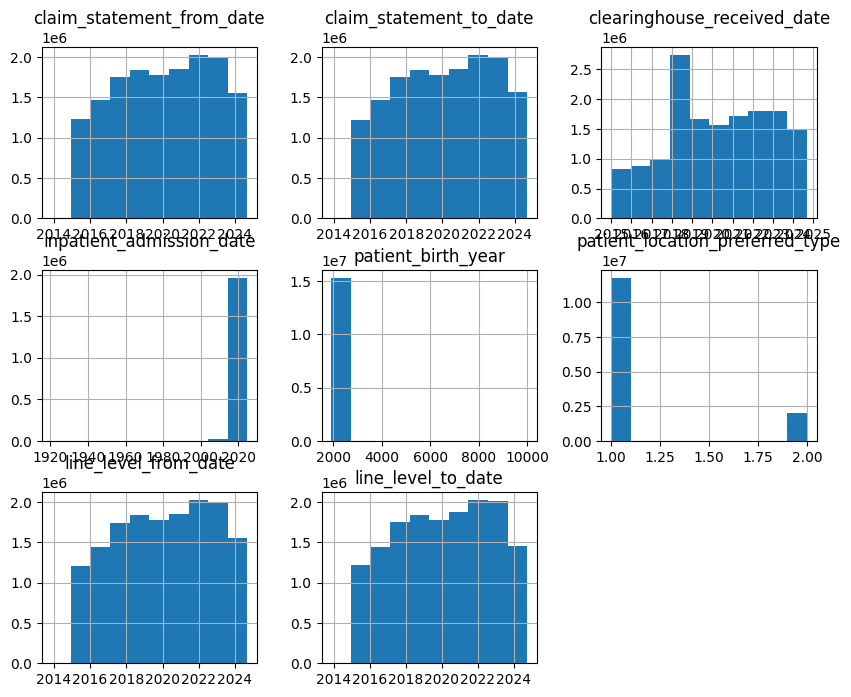

In [38]:
# histograms for numerical columns
mx_submits.hist(figsize=(10, 8))
plt.show()

1. **`claim_statement_from_date`**:
   - The x-axis shows dates (year range from 2014 to 2024), and the y-axis shows frequency (in millions).
   - This column likely represents the starting date of claims. The distribution is relatively uniform, with a slight increase around 2022–2023.

2. **`claim_statement_to_date`**:
   - Similar to the first histogram, the x-axis shows dates (2014 to 2024).
   - This might represent the end date for claims. The distribution is slightly skewed to the left, indicating more recent claim dates compared to `from_date`.

3. **`clearinghouse_received_date`**:
   - The x-axis shows dates, and the y-axis represents frequency.
   - This column represents the date the clearinghouse received the claim. The data shows a clear spike in certain years, with a large volume around 2020–2022.

4. **`patient_admission_date`**:
   - The x-axis ranges from around 1920 to 2020, and the y-axis shows a much smaller frequency compared to the other graphs.
   - This column represents the admission date of patients, with almost all values clustered in the recent years (2020 onward), which may indicate older dates are either rare or erroneous data.

5. **`patient_birth_year`**:
   - The x-axis shows birth years from around 1900 to 2020, and the y-axis shows a high frequency.
   - This likely indicates patients' birth years. The distribution has a spike near 2020, which could indicate potential errors or unrealistic birth dates in the dataset.

6. **`patient_location_preferred_type`**:
   - The x-axis shows discrete values (1.0, 1.25, 1.5, 2.0), representing some categorical information about patient location preferences.
   - The majority of values are around 1.0, with smaller counts around 2.0. This may represent different location categories, but further context would be needed to understand the meaning of these categories.

7. **`line_level_from_date`**:
   - The x-axis ranges from 2014 to 2024, and the y-axis shows frequency.
   - This column likely represents line-level start dates for claims. The distribution shows an increasing trend between 2014 and 2020, peaking around 2020–2022.

8. **`line_level_to_date`**:
   - Similar to the previous plot, the x-axis shows dates from 2014 to 2024.
   - This column may represent line-level end dates for claims. The distribution is quite uniform, with more activity between 2020 and 2024.

### General Observations:
- Many of the histograms show dates, suggesting this dataset has a strong temporal component.
- The distributions for most date-based columns (e.g., `claim_statement_from_date`, `line_level_from_date`) suggest that more data points exist in recent years (2020–2022).
- The `patient_birth_year` plot might indicate potential issues with data integrity, as there is a spike around recent years which could suggest erroneous entries.
- `patient_location_preferred_type` seems to represent a categorical feature, with one value dominating.

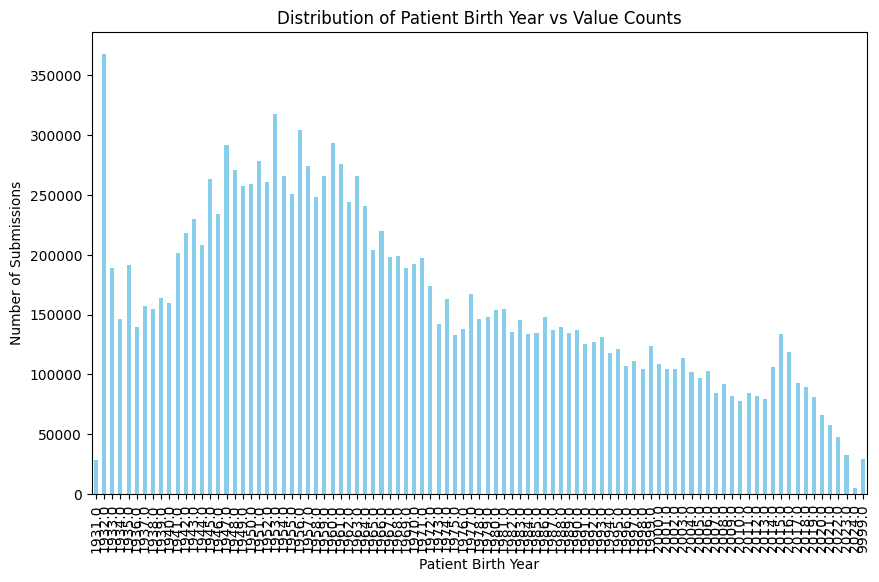

In [46]:
value_counts = mx_submits['patient_birth_year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Patient Birth Year vs Value Counts')
plt.xlabel('Patient Birth Year')
plt.ylabel('Number of Submissions')
plt.xticks(rotation=90)
plt.show()

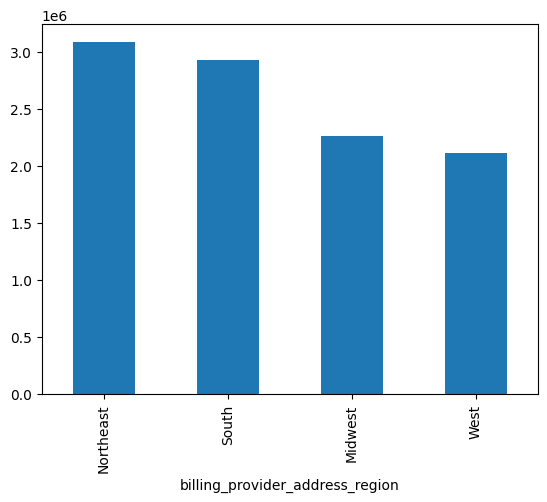

In [50]:
# Bar plot for categorical columns
mx_submits['billing_provider_address_region'].value_counts().plot(kind='bar')
plt.show()

# Detecting outliers

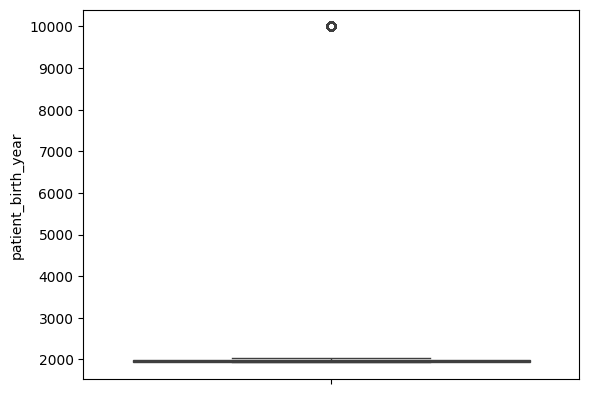

In [51]:
sns.boxplot(mx_submits['patient_birth_year'])
plt.show()